# Diabetes Prediction using Logistic Regression

### Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import itertools

### Getting Data

In [ ]:
df = pd.read_csv('/content/diabetes2.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### Data Preprocessing

In [ ]:
df.isnull().any()  # checking for null values

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

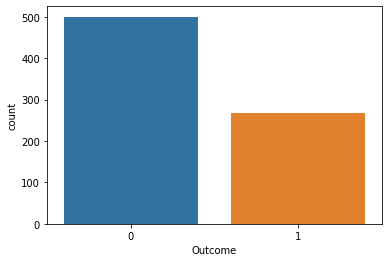

In [ ]:
# checking the distribution of outcomes
sns.countplot(x="Outcome",data=df)

In [ ]:
# checking variance
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns

In [ ]:
vif

,VIF,Features
0,3.275748,Pregnancies
1,16.725078,Glucose
2,14.619512,BloodPressure
3,4.008696,SkinThickness
4,2.063689,Insulin
5,18.408884,BMI
6,3.195626,DiabetesPedigreeFunction
7,13.492985,Age


In [ ]:
# dropping all columns which have vif more than 10
df = df.drop(['Glucose', 'BloodPressure', 'BMI', 'Age'], axis = 1)

In [ ]:
df  # required attributes only

,Pregnancies,SkinThickness,Insulin,DiabetesPedigreeFunction,Outcome
0,6,35,0,0.627,1
1,1,29,0,0.351,0
2,8,0,0,0.672,1
3,1,23,94,0.167,0
4,0,35,168,2.288,1
...,...,...,...,...,...
763,10,48,180,0.171,0
764,2,27,0,0.340,0
765,5,23,112,0.245,0
766,1,0,0,0.349,1


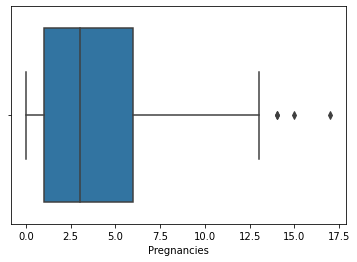

In [ ]:
# checking for outliners and removing them
import seaborn as sns
sns.boxplot(x=df['Pregnancies'])

In [ ]:
outliers_removed = [x for x in df['Pregnancies'] if x >= 12.5 and x <= 17.5]
for i in df['Pregnancies']:
  if i in set(outliers_removed):
    df['Pregnancies'] = df['Pregnancies'].replace(i,df['Pregnancies'].mean())

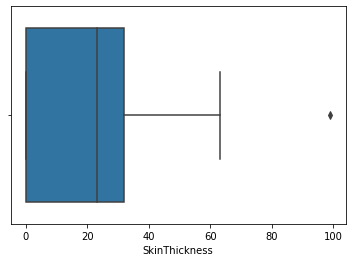

In [ ]:
sns.boxplot(x=df['SkinThickness'])

In [ ]:
outliers_removed = [x for x in df['SkinThickness'] if x >= 80 and x <= 120]
for i in df['SkinThickness']:
  if i in set(outliers_removed):
    df['SkinThickness'] = df['SkinThickness'].replace(i,df['SkinThickness'].mean())

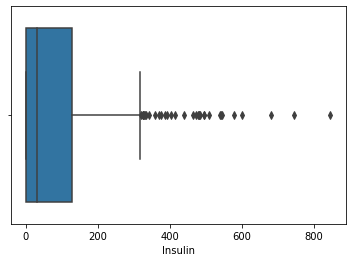

In [ ]:
sns.boxplot(x=df['Insulin'])

In [ ]:
outliers_removed = [x for x in df['Insulin'] if x >= 250 and x <= 900]
for i in df['Insulin']:
  if i in set(outliers_removed):
    df['Insulin'] = df['Insulin'].replace(i,df['Insulin'].mean())

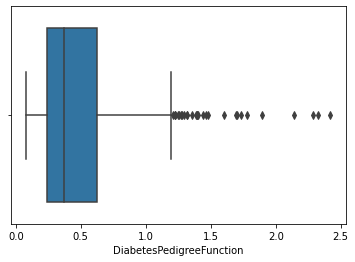

In [ ]:
sns.boxplot(x=df['DiabetesPedigreeFunction'])

In [ ]:
outliers_removed = [x for x in df['DiabetesPedigreeFunction'] if x >= 1 and x <= 2.5]
for i in df['DiabetesPedigreeFunction']:
  if i in set(outliers_removed):
    df['DiabetesPedigreeFunction'] = df['DiabetesPedigreeFunction'].replace(i,df['DiabetesPedigreeFunction'].mean())

In [ ]:
df  # our final dataframe is ready

,Pregnancies,SkinThickness,Insulin,DiabetesPedigreeFunction,Outcome
0,6.0,35.0,0.0,0.627000,1
1,1.0,29.0,0.0,0.351000,0
2,8.0,0.0,0.0,0.672000,1
3,1.0,23.0,94.0,0.167000,0
4,0.0,35.0,168.0,0.471876,1
...,...,...,...,...,...
763,10.0,48.0,180.0,0.171000,0
764,2.0,27.0,0.0,0.340000,0
765,5.0,23.0,112.0,0.245000,0
766,1.0,0.0,0.0,0.349000,1


In [ ]:
# checking skewness of data
# if it would have not been in [-1,1], I would have applied log transformation
df.skew(axis = 0, skipna = True)

Pregnancies                 0.745142
SkinThickness              -0.028882
Insulin                     0.931583
DiabetesPedigreeFunction    0.708226
Outcome                     0.635017
dtype: float64

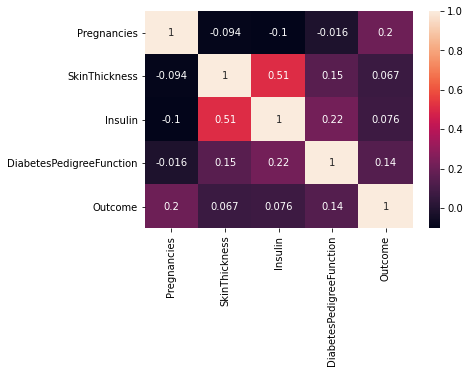

In [ ]:
# checking for coorelations
# if it would have been >1, I would have dropped those columns
corr = df.corr()
sns.heatmap(corr, annot=True)  # quantifying the relationship

### Training and Testing

In [ ]:
data = df.values
X, y = data[:,:-1], data[:,-1]

In [ ]:
# standardization
scaled_features = StandardScaler().fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( scaled_features, y, test_size=0.3, random_state=0)  # splitting in the ratio 70:30

### Training the Model

In [ ]:
model = LogisticRegression(C=0.0001, solver='liblinear').fit(X_train,y_train)
model

LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

### Making Predictions

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred_prob = model.predict_proba(X_test)
y_pred_prob

array([[0.5 , 0.5 ],
       [0.5 , 0.5 ],
       [0.5 , 0.5 ],
       [0.5 , 0.5 ],
       [0.5 , 0.5 ],
       [0.5 , 0.5 ],
       [0.5 , 0.5 ],
       [0.5 , 0.5 ],
       [0.5 , 0.5 ],
       [0.5 , 0.5 ],
       [0.5 , 0.5 ],
       [0.5 , 0.5 ],
       [0.5 , 0.5 ],
       [0.5 , 0.5 ],
       [0.5 , 0.5 ],
       [0.5 , 0.5 ],
       [0.5 , 0.5 ],
       [0.5 , 0.5 ],
       [0.5 , 0.5 ],
       [0.5 , 0.5 ],
       [0.5 , 0.5 ],
       [0.5 , 0.5 ],
       [0.5 , 0.5 ],
       [0.5 , 0.5 ],
       [0.5 , 0.5 ],
       [0.5 , 0.5 ],
       [0.5 , 0.5 ],
       [0.5 , 0.5 ],
       [0.5 , 0.5 ],
       [0.5 , 0.5 ],
       [0.5 , 0.5 ],
       [0.5 , 0.5 ],
       [0.5 , 0.5 ],
       [0.5 , 0.5 ],
       [0.5 , 0.5 ],
       [0.5 , 0.5 ],
       [0.5 , 0.5 ],
       [0.5 , 0.5 ],
       [0.5 , 0.5 ],
       [0.5 , 0.5 ],
       [0.5 , 0.5 ],
       [0.5 , 0.5 ],
       [0.5 , 0.5 ],
       [0.5 , 0.5 ],
       [0.5 , 0.5 ],
       [0.5 , 0.5 ],
       [0.5 , 0.5 ],
       [0.5 ,

### Checking Accuracy

In [ ]:
jaccard_similarity_score(y_test, y_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.7316017316017316

### Predictions are 73.16% accurate.

### Visualizing Results

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.grid(False)
print(confusion_matrix(y_test, y_pred, labels=[1,0]))

[[ 22  52]
 [ 10 147]]


Confusion matrix, without normalization
[[ 22  52]
 [ 10 147]]


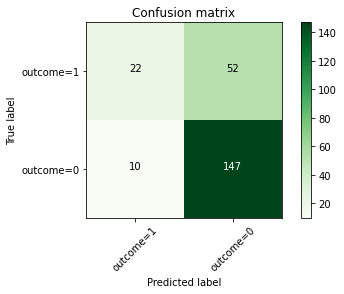

In [ ]:
# computing confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[1,0])
np.set_printoptions(precision=2)

# plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['outcome=1','outcome=0'],normalize=False, title='Confusion matrix')

In [ ]:
mean_squared_error(y_test, y_pred) 

0.2683982683982684

### Error is very less.